In [1]:
import json
import pandas as pd
import numpy as np
import re
from collections import Counter
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_json('/Users/varshananajipuram/Downloads/News_Category_Dataset_v2.json', lines=True)
print(df.shape)
df.head(2)

(200853, 6)


,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26


In [3]:
df['category'].nunique()

41

In [4]:
df['category'].value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

In [5]:
def clean_text(sentence):
    sentence = sentence.lower()
    sentence = re.sub('[0-9]+', '', sentence)
    sentence = re.sub('\W+',' ', sentence)
    sentence = re.sub('[^A-Za-z0-9]+', ' ', sentence)

    return sentence

In [6]:
df['short_description']=df['short_description'].map(lambda s: clean_text(s)) 
df['headline']=df['headline'].map(lambda s: clean_text(s)) 
df['text'] = df['headline'] + " " + df['short_description']
#df['text'] = df['headline']

In [7]:
X = df['text']
y = df['category']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test, random_state=1)

In [9]:
print("Number of records in train data: ", len(X_train))
print("Number of records in test data: ", len(X_test))
print("Number of records in validation data: ", len(X_val))

Number of records in train data:  160682
Number of records in test data:  20085
Number of records in validation data:  20086


In [10]:
all_words_list = []
for news in X_train:
    words = news.split()
    all_words_list.append(words)
    
all_words = [val for sublist in all_words_list for val in sublist]

print(all_words[:10])

['police', 'driver', 'stranded', 'in', 'blizzard', 'shot', 'and', 'killed', 'man', 'who']


In [11]:
words_count_dict = dict(Counter(all_words))
print("The number of distinct words is :", len(words_count_dict.keys()))

The number of distinct words is : 77194


In [12]:
first_5_words = {k: words_count_dict[k] for k in list(words_count_dict)[:5]}
print(first_5_words)

{'police': 2236, 'driver': 286, 'stranded': 63, 'in': 77139, 'blizzard': 39}


In [13]:
vocabulary = [key for key, val in words_count_dict.items() if val > 100]
print(len(vocabulary))
print(vocabulary[:5])

4701
['police', 'driver', 'in', 'shot', 'and']


In [14]:
vectorizer = CountVectorizer(vocabulary=vocabulary)
vectorizer.fit(X_train)
#print(len(vectorizer.get_feature_names_out()))
print(len(vectorizer.get_feature_names()))
vectorizer.get_feature_names()

4701


['police',
 'driver',
 'in',
 'shot',
 'and',
 'killed',
 'man',
 'who',
 'tried',
 'to',
 'help',
 'him',
 'a',
 'was',
 'the',
 'county',
 'jail',
 'on',
 'saturday',
 'charged',
 'with',
 'murder',
 'after',
 'he',
 'allegedly',
 'fatally',
 'good',
 'jessica',
 'mad',
 'men',
 'season',
 'star',
 'style',
 'being',
 'married',
 'don',
 'extremely',
 'costumes',
 'not',
 'only',
 'have',
 'an',
 'impact',
 's',
 'acting',
 'but',
 'also',
 'her',
 'personal',
 'wardrobe',
 'be',
 'still',
 'our',
 'hearts',
 'chocolate',
 'grilled',
 'cheese',
 'this',
 'is',
 'everything',
 'miley',
 'cyrus',
 'lena',
 'dunham',
 'show',
 'off',
 'their',
 'christmas',
 'more',
 'tweets',
 'of',
 'week',
 'photos',
 'hint',
 'she',
 'one',
 'favorite',
 'girls',
 'best',
 'credit',
 'cards',
 'for',
 'newly',
 'average',
 'student',
 'debt',
 'now',
 'isn',
 't',
 'time',
 'treat',
 'card',
 'like',
 'source',
 'emergency',
 'income',
 'stay',
 'focused',
 'your',
 'goal',
 'building',
 'history',


In [15]:
X_train_feat = vectorizer.transform(X_train)
print(X_train_feat.todense().shape)

(160682, 4701)


In [16]:
X_test_feat = vectorizer.transform(X_test)
print(X_test_feat.todense().shape)

(20085, 4701)


In [17]:
X_val_feat = vectorizer.transform(X_val)
print(X_val_feat.todense().shape)

(20086, 4701)


In [18]:
categorie_prior_prob = y_train.value_counts()/len(y_train)
df_categorie_prior_prob = categorie_prior_prob.to_frame()
df_categorie_prior_prob.reset_index(inplace=True)
df_categorie_prior_prob.columns = ['category', 'prior_prob']

In [19]:
P_prior_catg = df_categorie_prior_prob['prior_prob'].values
#P_prior_catg

In [20]:
df_categorie_prior_prob.head(5)

,category,prior_prob
0,POLITICS,0.162999
1,WELLNESS,0.088759
2,ENTERTAINMENT,0.079947
3,TRAVEL,0.049228
4,STYLE & BEAUTY,0.048039


In [21]:
df_categorie_prior_prob.tail(5)

,category,prior_prob
36,ENVIRONMENT,0.006584
37,COLLEGE,0.005694
38,LATINO VOICES,0.005620
39,CULTURE & ARTS,0.005128
40,EDUCATION,0.004997


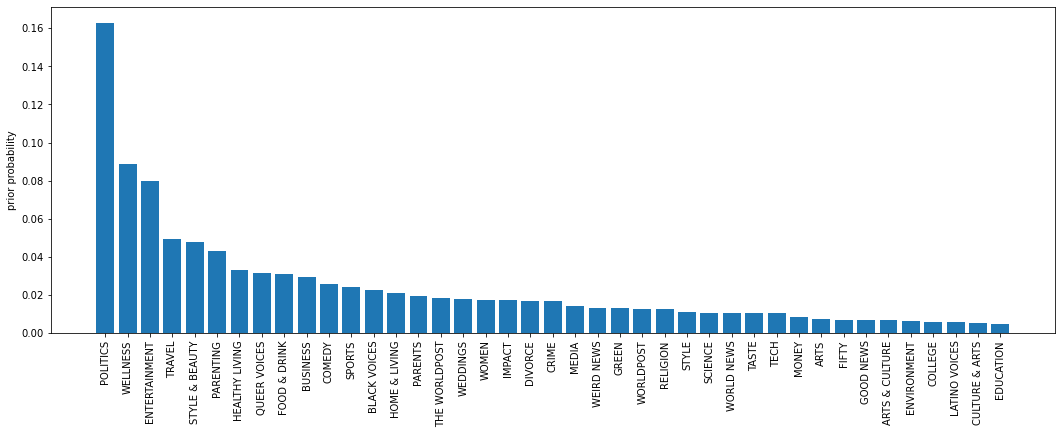

In [22]:
fig = plt.figure(figsize=(18, 6))
plt.bar(df_categorie_prior_prob['category'], df_categorie_prior_prob['prior_prob'])
_ = plt.xticks(rotation=90)
_ = plt.ylabel("prior probability")

In [23]:
# smoothing parameter
alpha = 1

In [24]:
# vocabulary size, the number of distinct words
n_vocabulary = len(vocabulary)
print(n_vocabulary)

4701


In [25]:
categories = df_categorie_prior_prob['category'].values
n_categories = len(categories)
print(n_categories)

41


In [26]:
#print(vocabulary)

In [27]:
P_word_catg = pd.DataFrame() 
for categorie in tqdm(categories):
    catg_X_train_feat = X_train_feat[y_train == categorie]
    catg_all_words_count = catg_X_train_feat.sum()
    catg_each_word_count = catg_X_train_feat.sum(axis=0)  
    catg_each_word_count = catg_each_word_count.flatten() + alpha
    catg_each_word_prob = catg_each_word_count/(catg_all_words_count + alpha*n_vocabulary)
    
    #catg_each_word_prob = catg_each_word_count
    
    P_word_catg = pd.concat([P_word_catg, pd.DataFrame(catg_each_word_prob)])

    
P_word_catg.columns = vocabulary
P_word_catg.index = categories

print(P_word_catg.shape)

100%|███████████████████████████████████████████| 41/41 [00:00<00:00, 69.40it/s]

(41, 4701)


In [28]:
P_word_catg.head(2)

,police,driver,in,shot,and,killed,man,who,tried,to,...,henry,thrive,strangers,targeting,honey,involves,rent,tina,feast,stereotypes
POLITICS,0.000874,0.000039,0.018557,0.000225,0.017017,0.000252,0.000637,0.002929,0.000203,0.034246,...,0.000029,0.000010,0.000007,0.000077,0.000002,0.000012,0.000022,0.000005,0.000003,0.000017
WELLNESS,0.000027,0.000029,0.018252,0.000052,0.031220,0.000029,0.000291,0.002854,0.000177,0.037627,...,0.000017,0.000058,0.000035,0.000012,0.000023,0.000067,0.000006,0.000008,0.000019,0.000012


In [29]:
def predict(X_feat, P_prior_catg, P_word_catg, categories):
    predictions = []
    P_word_catg_mat = P_word_catg.to_numpy()
    X_feat = X_feat.todense() 
    for news_feat in tqdm(X_feat):
        P_likelihood_news = np.multiply(news_feat, P_word_catg_mat)
        P_likelihood_news[P_likelihood_news == 0] = 1
        P_likelihood_news = np.prod(P_likelihood_news, axis=1).flatten()
        P_each_class_pred = np.multiply(P_likelihood_news, P_prior_catg.T) # multiply likelihood with prior prob
        categorie = categories[np.argmax(P_each_class_pred)]
        predictions.append(categorie)
        
    return predictions

In [30]:
y_train_pred = predict(X_train_feat, P_prior_catg, P_word_catg, categories)

100%|█████████████████████████████████| 160682/160682 [01:26<00:00, 1850.00it/s]


In [41]:
print("overall accuracy")
print(accuracy_score(y_train, y_train_pred))

overall accuracy
0.5976338357750091


In [32]:
print("classification report")
print(classification_report(y_train, y_train_pred))

classification report
                precision    recall  f1-score   support

          ARTS       0.47      0.44      0.45      1207
ARTS & CULTURE       0.57      0.37      0.44      1071
  BLACK VOICES       0.51      0.36      0.42      3622
      BUSINESS       0.51      0.47      0.49      4750
       COLLEGE       0.55      0.50      0.52       915
        COMEDY       0.50      0.50      0.50      4140
         CRIME       0.43      0.77      0.55      2724
CULTURE & ARTS       0.57      0.55      0.56       824
       DIVORCE       0.70      0.73      0.71      2741
     EDUCATION       0.44      0.59      0.50       803
 ENTERTAINMENT       0.63      0.65      0.64     12846
   ENVIRONMENT       0.57      0.43      0.49      1058
         FIFTY       0.28      0.36      0.31      1121
  FOOD & DRINK       0.60      0.76      0.67      4981
     GOOD NEWS       0.44      0.44      0.44      1118
         GREEN       0.46      0.46      0.46      2098
HEALTHY LIVING       0.40

In [33]:
print("confusion matrix")
cm = confusion_matrix(y_train, y_train_pred)
print(cm)

confusion matrix
[[ 533   32   10 ...   14    0   14]
 [  38  392   23 ...   35    2    3]
 [  19   11 1311 ...   67   10   10]
 ...
 [   4   10   37 ... 1131   10    4]
 [   5    1   10 ...    7  656  117]
 [   9    5    8 ...   12   78  876]]


<AxesSubplot:>

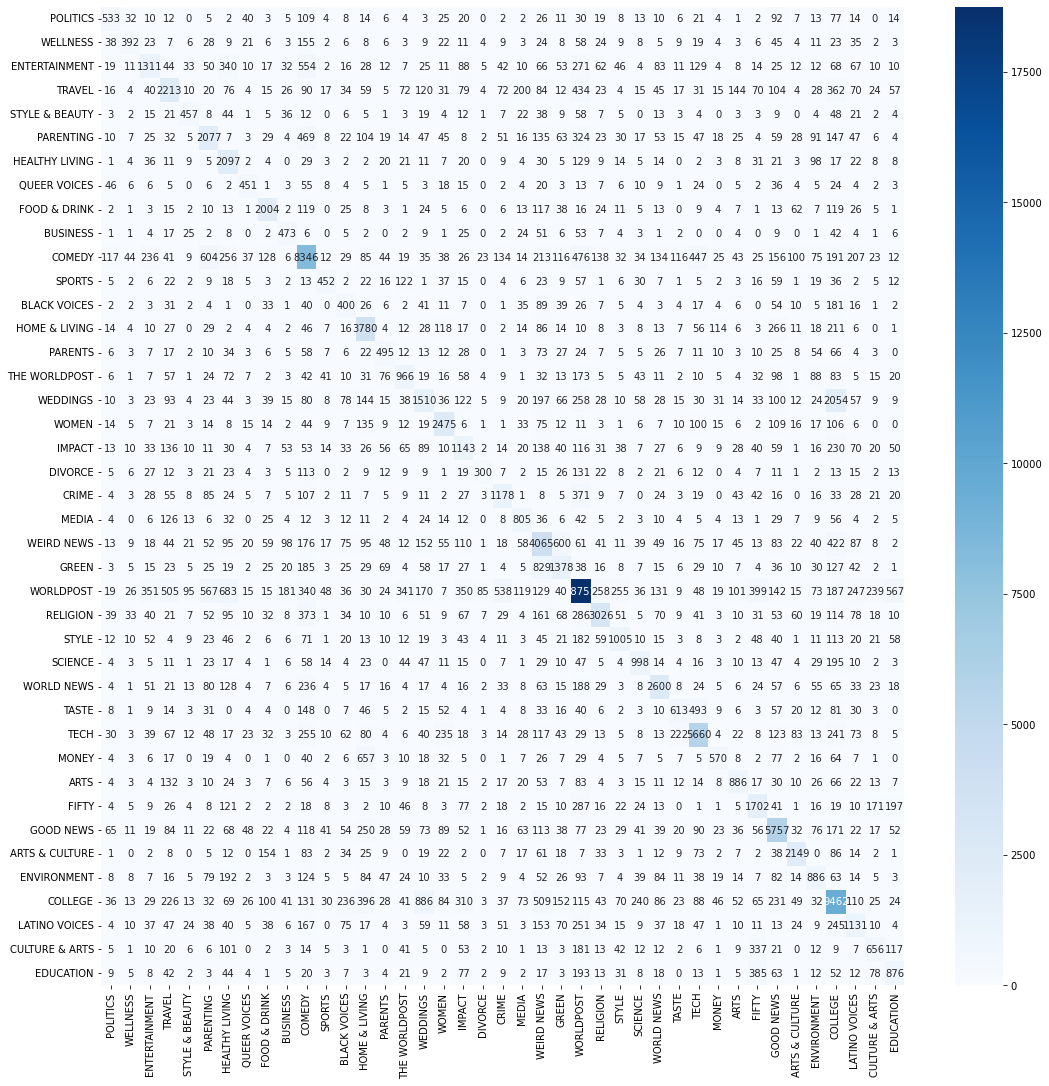

In [34]:
plt.figure(figsize = (18, 18))
df_cm = pd.DataFrame(cm, index=categories, columns=categories)
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

In [35]:
y_test_pred = predict(X_test_feat, P_prior_catg, P_word_catg, categories)

100%|███████████████████████████████████| 20085/20085 [00:10<00:00, 1864.86it/s]


In [37]:
print("overall accuracy")
print(accuracy_score(y_test, y_test_pred))

overall accuracy
0.5304456061737615


In [38]:
print("classification report")
print(classification_report(y_test, y_test_pred))

classification report
                precision    recall  f1-score   support

          ARTS       0.25      0.25      0.25       151
ARTS & CULTURE       0.31      0.19      0.23       134
  BLACK VOICES       0.44      0.29      0.35       453
      BUSINESS       0.41      0.39      0.40       593
       COLLEGE       0.40      0.30      0.35       115
        COMEDY       0.43      0.42      0.43       517
         CRIME       0.39      0.70      0.50       341
CULTURE & ARTS       0.30      0.25      0.27       103
       DIVORCE       0.60      0.66      0.62       343
     EDUCATION       0.39      0.46      0.42       101
 ENTERTAINMENT       0.60      0.63      0.61      1606
   ENVIRONMENT       0.37      0.24      0.29       133
         FIFTY       0.17      0.24      0.20       140
  FOOD & DRINK       0.56      0.71      0.63       622
     GOOD NEWS       0.27      0.24      0.25       140
         GREEN       0.39      0.37      0.38       262
HEALTHY LIVING       0.27

In [39]:
print("confusion matrix")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

confusion matrix
[[ 37   8   4 ...   2   0   3]
 [  5  25   2 ...   9   0   0]
 [  5   4 132 ...  17   4   1]
 ...
 [  2   1   5 ... 104   2   0]
 [  0   0   1 ...   3  49  27]
 [  3   1   2 ...   3   8  82]]


<AxesSubplot:>

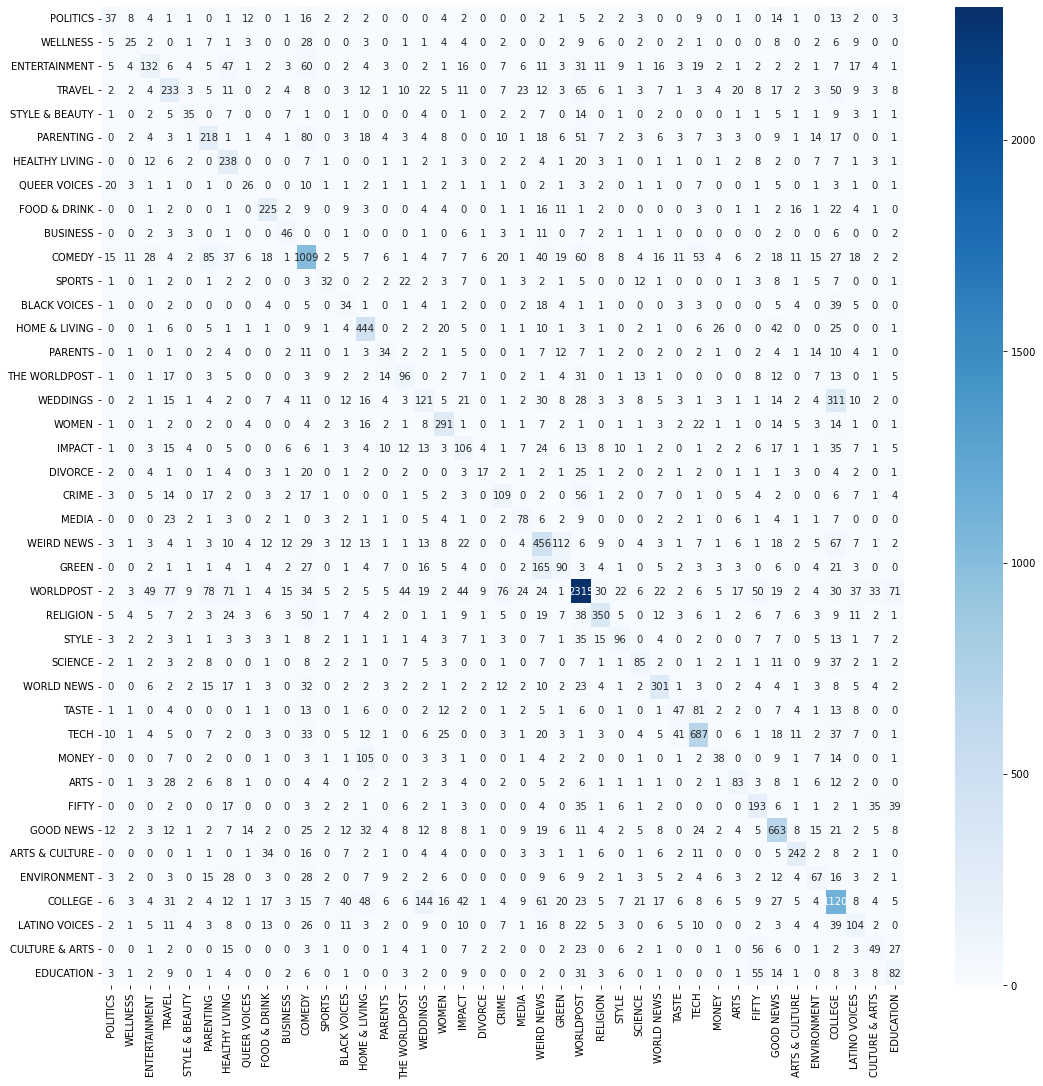

In [40]:
plt.figure(figsize = (18, 18))
df_cm = pd.DataFrame(cm, index=categories, columns=categories)
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')